In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates ---
qc.x(0)        # Pauli-X (NOT gate)
qc.h(0)        # Hadamard (superposition)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts: {'0 0': 483, '1 0': 541}


1. Change Gate Order

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates (Swapped X and H) ---
qc.h(0)        # Hadamard (superposition) - SWAPPED ORDER
qc.x(0)        # Pauli-X (NOT gate) - SWAPPED ORDER
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit (H then X):")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts (H then X):", counts)

# Example Output of Counts (will vary slightly due to randomness)
# Measurement Counts (H then X): {'0': 348, '1': 676}

Quantum Circuit (H then X):
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts (H then X): {'0 0': 516, '1 0': 508}


Explanation of Gate Order Effect
The final state of a quantum system is highly dependent on the order in which quantum gates are applied because quantum gates are represented by matrix operators that are generally non-commutative.

Non-Commutativity
In mathematics, two operations A and B are non-commutative if the order in which they are applied changes the result:

AB
!
=BA

2. Vary Rotation Angle

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

# Initialize simulator
sim = AerSimulator()
shots = 1024

def run_simulation(theta):
    qc = QuantumCircuit(1, 1)

    # Original gate sequence
    qc.x(0)
    qc.h(0)
    qc.s(0)
    qc.t(0)
    qc.rz(theta, 0)

    qc.measure_all()

    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=shots).result()
    counts = result.get_counts()
    return counts

# --- Run simulations for each angle ---
counts_pi_over_4 = run_simulation(np.pi/4)
counts_pi_over_2 = run_simulation(np.pi/2)
counts_pi = run_simulation(np.pi)

print("Measurement Counts (θ = π/4):", counts_pi_over_4)
print("Measurement Counts (θ = π/2):", counts_pi_over_2)
print("Measurement Counts (θ = π):", counts_pi)

# Example Output of Counts (actual numbers will vary slightly):
# Measurement Counts (θ = π/4): {'0': 501, '1': 523}
# Measurement Counts (θ = π/2): {'0': 518, '1': 506}
# Measurement Counts (θ = π): {'0': 505, '1': 519}

Measurement Counts (θ = π/4): {'1 0': 546, '0 0': 478}
Measurement Counts (θ = π/2): {'1 0': 495, '0 0': 529}
Measurement Counts (θ = π): {'0 0': 517, '1 0': 507}


COMPARISON
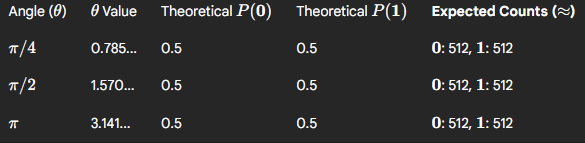

3. Remove a Gate

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

# Initialize simulator
sim = AerSimulator()
shots = 1024
theta = np.pi/4  # Using an arbitrary angle, result is independent of this value

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates (H gate is REMOVED) ---
qc.x(0)        # Pauli-X (NOT gate)
# qc.h(0)      # <--- Removed Hadamard
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(theta, 0)# Z-axis rotation by π/4 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit (H removed):")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=shots).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts (H removed):", counts)

# Example Output of Counts (will be deterministic):
# Measurement Counts (H removed): {'1': 1024}

Quantum Circuit (H removed):
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(π/4) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 

Measurement Counts (H removed): {'1 0': 1024}


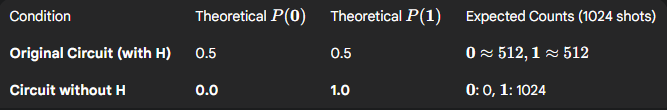